# Cryptocurrency Trends Analysis <br><br> by Dongsuk Jeong

> In this project, I will use Cryptowatch API to collect the market price information of big cryptocurrencies such as Bitcoin, Ethereum, and Dogecoin in order to see the trend of crpyto market. I will plot individual graph for each coin, then plot all of graph together on two different ways. Even though it is well known fact that crpytocurrency market is heavily affected by the movement of bitcoin and etherium, it is fun to visualize and check it through graph. First thing first, l
et's import neccessary library first 

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import statsmodels.api as sm

<br>Use `request` to call api and import data. `'periods': 86400` means setting up the time period for 1 day.

In [2]:
req1 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/btcusd/ohlc', params={'periods': '86400'})
data1 = req1.json()

Simply run below code to check whether request is working fine or not. 

In [3]:
# data1 (delete # to run code)

<br>Okay, request is working fine. Now let's change json file to pandas data frame format and drop unnecessary column.

In [4]:
df1 = pd.DataFrame(data1['result']['86400'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

In [5]:
df1.drop(columns=['QuoteVolume'], inplace=True)

<br>Check how our data frame looks like and overall information.

In [6]:
df1.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,1422316800,275.609985,276.059998,269.600006,274.480011,199.258667
1,1422403200,274.730011,278.470001,244.029999,263.649994,1609.966187
2,1422489600,263.959991,265.989990,228.500000,236.089996,5100.223633
3,1422576000,235.889999,242.000000,221.139999,235.029999,6627.899902
4,1422662400,235.000000,244.589996,227.889999,229.070007,5743.572266


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CloseTime   2465 non-null   int64  
 1   OpenPrice   2465 non-null   float64
 2   HighPrice   2465 non-null   float64
 3   LowPrice    2465 non-null   float64
 4   ClosePrice  2465 non-null   float64
 5   Volume      2465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 115.7 KB


<br>It looks pretty good, but closeTime does not make sense with this Unix timestamp format. Let's change it to more human friendly format using `to_datetime()` function.

In [8]:
df1['CloseTime'] = pd.to_datetime(df1['CloseTime'], unit='s')

In [9]:
df1.set_index('CloseTime', inplace=True)

In [10]:
df1.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2015-01-27,275.609985,276.059998,269.600006,274.480011,199.258667
2015-01-28,274.730011,278.470001,244.029999,263.649994,1609.966187
2015-01-29,263.959991,265.989990,228.500000,236.089996,5100.223633
2015-01-30,235.889999,242.000000,221.139999,235.029999,6627.899902
2015-01-31,235.000000,244.589996,227.889999,229.070007,5743.572266


Let's save the data just in case I need to come back to this point later. I will save it as CSV format.

In [11]:
df1.to_csv('data1.csv', index=True)

> when you want to read the file next time, run `df = pd.read_csv('data.csv')`

Finally, we are about to draw some visualization from our modified data set. Let's see how the price of bitcoin has been changed. I'm going to set up 'ClosePrice' & 'Volume' on y-axis and 'Close Time' on x-axis for **Bitcoin**. 

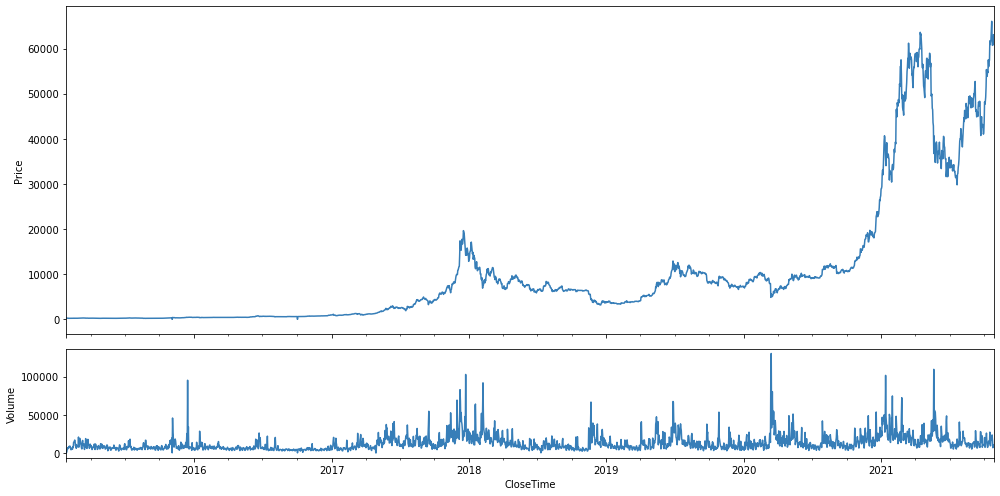

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df1['ClosePrice'].plot(ax=ax1, color='#377eb8')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df1['Volume'].plot(ax=ax2, color='#377eb8')
ax2.set_ylabel('Volume')

fig.tight_layout()

Finally, we did it. Such a nice graph. It feels nice, right?! Let's try to visualize on other crpytocurrencies as well. Here is the graph for **Ethereum**. Care for the time line when you compare the each graph since each of cryptocurrencies has different time line 

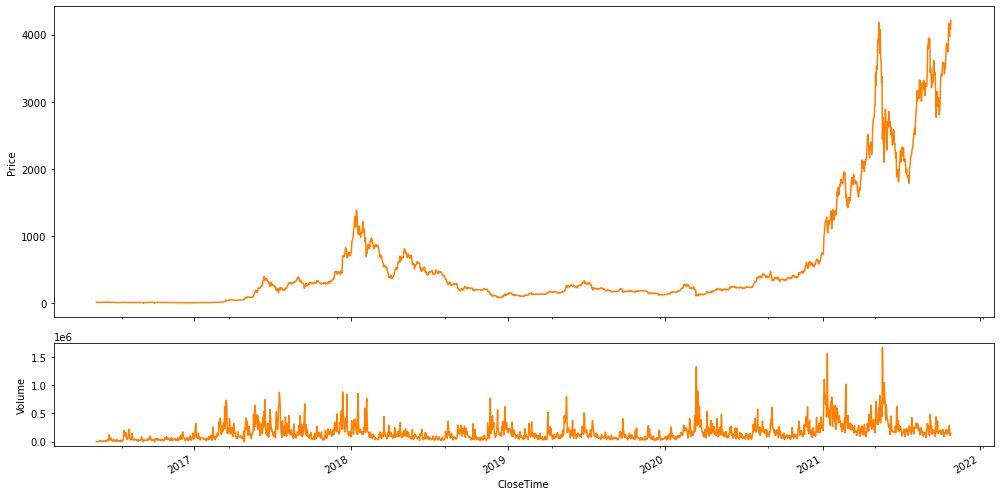

In [13]:
req2 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/ethusd/ohlc', params={'periods': '86400'})
data2 = req2.json()

df2 = pd.DataFrame(data2['result']['86400'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df2.drop(columns=['QuoteVolume'], inplace=True)
df2['CloseTime'] = pd.to_datetime(df2['CloseTime'], unit='s')
df2.set_index('CloseTime', inplace=True)
df2.head()
df2.to_csv('data2.csv', index=True)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df2['ClosePrice'].plot(ax=ax1, color='#ff7f00')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df2['Volume'].plot(ax=ax2, color='#ff7f00')
ax2.set_ylabel('Volume')

fig.tight_layout()

Here is graph for **USDT**. FYI, USDT is stable coin that is aiming to keep price around $1.

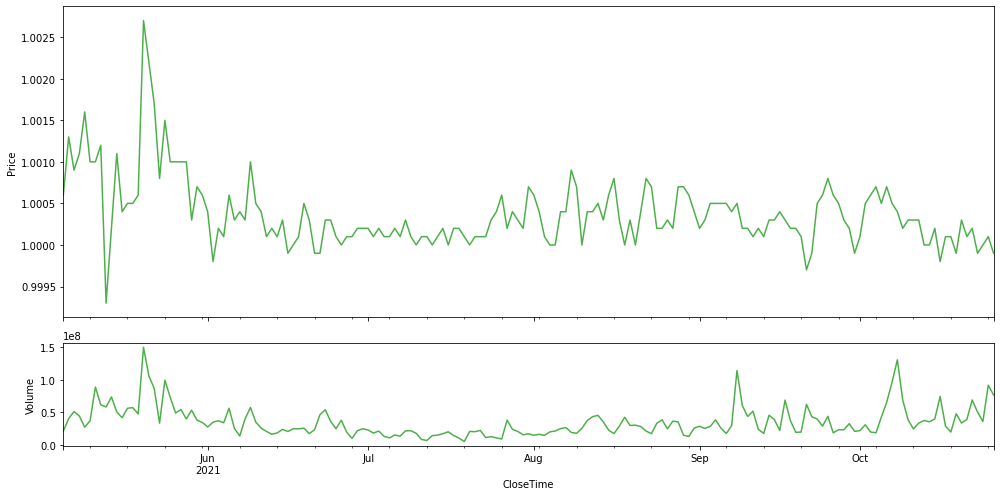

In [14]:
req3 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/usdtusd/ohlc', params={'periods': '86400'})
data3 = req3.json()

df3 = pd.DataFrame(data3['result']['86400'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df3.drop(columns=['QuoteVolume'], inplace=True)
df3['CloseTime'] = pd.to_datetime(df3['CloseTime'], unit='s')
df3.set_index('CloseTime', inplace=True)
df3.head()
df3.to_csv('data3.csv', index=True)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df3['ClosePrice'].plot(ax=ax1, color='#4daf4a')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df3['Volume'].plot(ax=ax2, color='#4daf4a')
ax2.set_ylabel('Volume')

fig.tight_layout()

When you glimpse the graph, it does not look like stable since you see the up and down movement. This is the tricky part when you look at the graph. When you look at the price range more carefully, you will notice that it only move from $ 0.9995 to $ 1.0025, which is very close to $ 1. <br><br> Alright, next graph is for **Adausd**

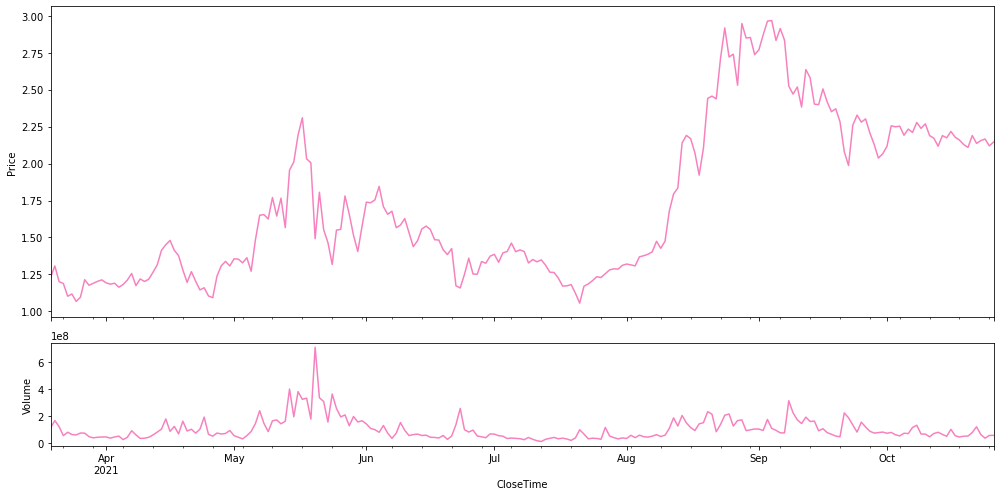

In [15]:
req4 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/adausd/ohlc', params={'periods': '86400'})
data4 = req4.json()

df4 = pd.DataFrame(data4['result']['86400'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df4.drop(columns=['QuoteVolume'], inplace=True)
df4['CloseTime'] = pd.to_datetime(df4['CloseTime'], unit='s')
df4.set_index('CloseTime', inplace=True)
df4.head()
df4.to_csv('data4.csv', index=True)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df4['ClosePrice'].plot(ax=ax1, color='#f781bf')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df4['Volume'].plot(ax=ax2, color='#f781bf')
ax2.set_ylabel('Volume')

fig.tight_layout()

Last one is for **Dogeusd**, which became quite famouse recently.

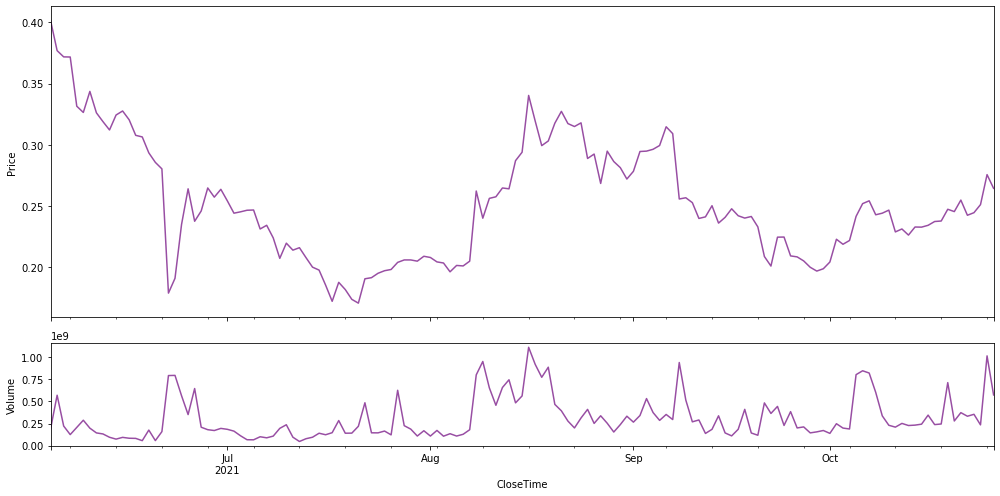

In [16]:
req5 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/dogeusd/ohlc', params={'periods': '86400'})
data5 = req5.json()

df5 = pd.DataFrame(data5['result']['86400'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df5.drop(columns=['QuoteVolume'], inplace=True)
df5['CloseTime'] = pd.to_datetime(df5['CloseTime'], unit='s')
df5.set_index('CloseTime', inplace=True)
df5.head()
df5.to_csv('data5.csv', index=True)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df5['ClosePrice'].plot(ax=ax1, color='#984ea3')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df5['Volume'].plot(ax=ax2, color='#984ea3')
ax2.set_ylabel('Volume')

fig.tight_layout()

We have dont enought for individual graph. How about putting themm all together. Are you Ready? Here we go 

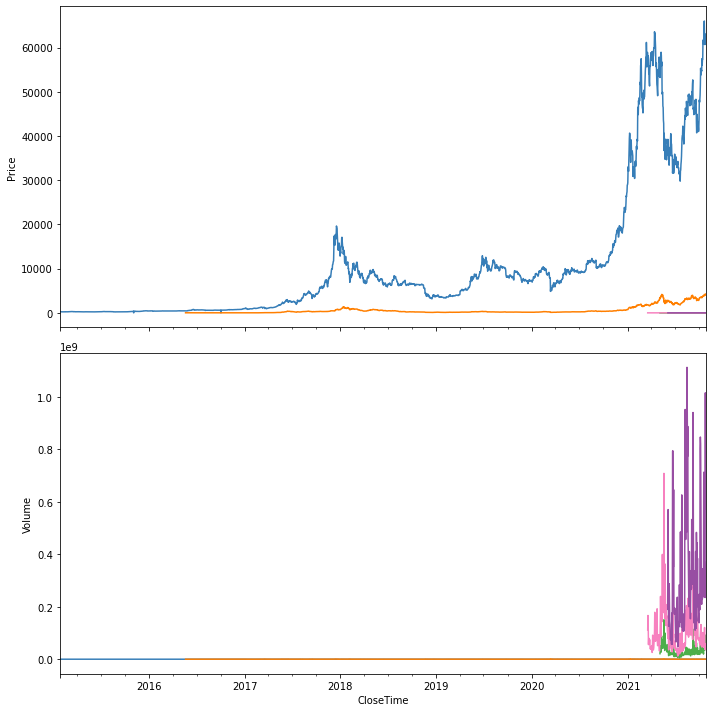

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw = {'height_ratios':[1, 1]})
df1['ClosePrice'].plot(ax=ax1, color='#377eb8')
df2['ClosePrice'].plot(ax=ax1, color='#ff7f00')
df3['ClosePrice'].plot(ax=ax1, color='#4daf4a')
df4['ClosePrice'].plot(ax=ax1, color='#f781bf')
df5['ClosePrice'].plot(ax=ax1, color='#984ea3')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df1['Volume'].plot(ax=ax2, color='#377eb8')
df2['Volume'].plot(ax=ax2, color='#ff7f00')
df3['Volume'].plot(ax=ax2, color='#4daf4a')
df4['Volume'].plot(ax=ax2, color='#f781bf')
df5['Volume'].plot(ax=ax2, color='#984ea3')
ax2.set_ylabel('Volume')


fig.tight_layout()

Hmm, that looks quite weirld. Each graph is too crowed so it is hard to see what's going on. It is because each cryptocurrencies has a huge different price range and time line. <br><br> We can convert each coins' price into log format and look up the price on same time period in order to compare them relatively easily. For that, I will combine each dataframes into one and look up the price in certain time period.

In [23]:
# make a copy of each data frame
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()
df4_copy = df4.copy()
df5_copy = df5.copy()

In [24]:
# Adding 'Name' columns on each copy of data frames
df_list = [df1_copy, df2_copy, df3_copy, df4_copy, df5_copy]
lists = ["btcusd", "ethusd", "usdtusd", "adausd", "dogeusd"]

for i in range(len(lists)): 
    df_list[i]['Name'] = lists[i]

In [25]:
# append all of dataframe into one 
df = df1_copy.copy()
df = df.append([df2_copy, df3_copy, df4_copy, df5_copy])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4988 entries, 2015-01-27 to 2021-10-26
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   4988 non-null   float64
 1   HighPrice   4988 non-null   float64
 2   LowPrice    4988 non-null   float64
 3   ClosePrice  4988 non-null   float64
 4   Volume      4988 non-null   float64
 5   Name        4988 non-null   object 
dtypes: float64(5), object(1)
memory usage: 272.8+ KB


In [27]:
df.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Name
CloseTime,,,,,,
2021-10-22,0.2547,0.2585,0.2406,0.2424,3.326341e+08,dogeusd
2021-10-23,0.2423,0.2534,0.2349,0.2445,3.544797e+08,dogeusd
2021-10-24,0.2444,0.2538,0.2405,0.2511,2.350201e+08,dogeusd
2021-10-25,0.2510,0.2846,0.2458,0.2756,1.015028e+09,dogeusd
2021-10-26,0.2757,0.2806,0.2578,0.2644,5.730653e+08,dogeusd


In [28]:
# place the name column at the front   
df = pd.DataFrame(df, columns=[
    'Name', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume' 
])

In [29]:
# convert close price and volume into log format and add them on data frame
df_copy = df.copy()
df_copy.insert(5, 'Log_ClosePrice', np.log(df_copy['ClosePrice']))
df_copy.insert(7, 'Log_Volume', np.log(df_copy['Volume']))
df_copy.head()

C:\Users\joung\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,OpenPrice,HighPrice,LowPrice,ClosePrice,Log_ClosePrice,Volume,Log_Volume
CloseTime,,,,,,,,
2015-01-27,btcusd,275.609985,276.059998,269.600006,274.480011,5.614878,199.258667,5.294604
2015-01-28,btcusd,274.730011,278.470001,244.029999,263.649994,5.574622,1609.966187,7.383968
2015-01-29,btcusd,263.959991,265.989990,228.500000,236.089996,5.464213,5100.223633,8.537040
2015-01-30,btcusd,235.889999,242.000000,221.139999,235.029999,5.459713,6627.899902,8.799043
2015-01-31,btcusd,235.000000,244.589996,227.889999,229.070007,5.434028,5743.572266,8.655837


Let's save combined version of dataframe for next tiem use. `index=True` means save data frame including index which is 'CloseTime' in this data frame

In [30]:
df_copy.to_csv('data.csv', index=True)

FYI, you need to reset up the index again after you read csv file.

In [4]:
#df_copy = pd.read_csv('data.csv')
#df_copy.set_index('CloseTime', inplace=True)

In [31]:
# double chekc if the data is loaded correctly
df_copy.head()

,Name,OpenPrice,HighPrice,LowPrice,ClosePrice,Log_ClosePrice,Volume,Log_Volume
CloseTime,,,,,,,,
2015-01-27,btcusd,275.609985,276.059998,269.600006,274.480011,5.614878,199.258667,5.294604
2015-01-28,btcusd,274.730011,278.470001,244.029999,263.649994,5.574622,1609.966187,7.383968
2015-01-29,btcusd,263.959991,265.989990,228.500000,236.089996,5.464213,5100.223633,8.537040
2015-01-30,btcusd,235.889999,242.000000,221.139999,235.029999,5.459713,6627.899902,8.799043
2015-01-31,btcusd,235.000000,244.589996,227.889999,229.070007,5.434028,5743.572266,8.655837


In [32]:
df_copy.tail()

,Name,OpenPrice,HighPrice,LowPrice,ClosePrice,Log_ClosePrice,Volume,Log_Volume
CloseTime,,,,,,,,
2021-10-22,dogeusd,0.2547,0.2585,0.2406,0.2424,-1.417166,3.326341e+08,19.622554
2021-10-23,dogeusd,0.2423,0.2534,0.2349,0.2445,-1.408540,3.544797e+08,19.686162
2021-10-24,dogeusd,0.2444,0.2538,0.2405,0.2511,-1.381904,2.350201e+08,19.275182
2021-10-25,dogeusd,0.2510,0.2846,0.2458,0.2756,-1.288805,1.015028e+09,20.738182
2021-10-26,dogeusd,0.2757,0.2806,0.2578,0.2644,-1.330292,5.730653e+08,20.166510


Let's find out how many data is in this frame

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4988 entries, 2015-01-27 to 2021-10-26
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4988 non-null   object 
 1   OpenPrice       4988 non-null   float64
 2   HighPrice       4988 non-null   float64
 3   LowPrice        4988 non-null   float64
 4   ClosePrice      4988 non-null   float64
 5   Log_ClosePrice  4988 non-null   float64
 6   Volume          4988 non-null   float64
 7   Log_Volume      4988 non-null   float64
dtypes: float64(7), object(1)
memory usage: 350.7+ KB


In [34]:
df_copy.shape

(4988, 8)

`shape` is just quick way to see how big the data set is. Let's double check to see there is null data or not

In [35]:
df_copy.isnull().sum()

Name              0
OpenPrice         0
HighPrice         0
LowPrice          0
ClosePrice        0
Log_ClosePrice    0
Volume            0
Log_Volume        0
dtype: int64

Since each cryptocurrencies appeared on market in different time period I will look up from July 2021, when all of 5 coins were on the market. Moreover, I didn't convert the **dogeusd** into log form since dogeusd is less than $1 so it will become negative when convering to log format. It would be okay since the purpose of graph is to see the price change along with each other   

In [36]:
df_copy1 = df_copy.loc['2021-07-01':'2021-09-01']

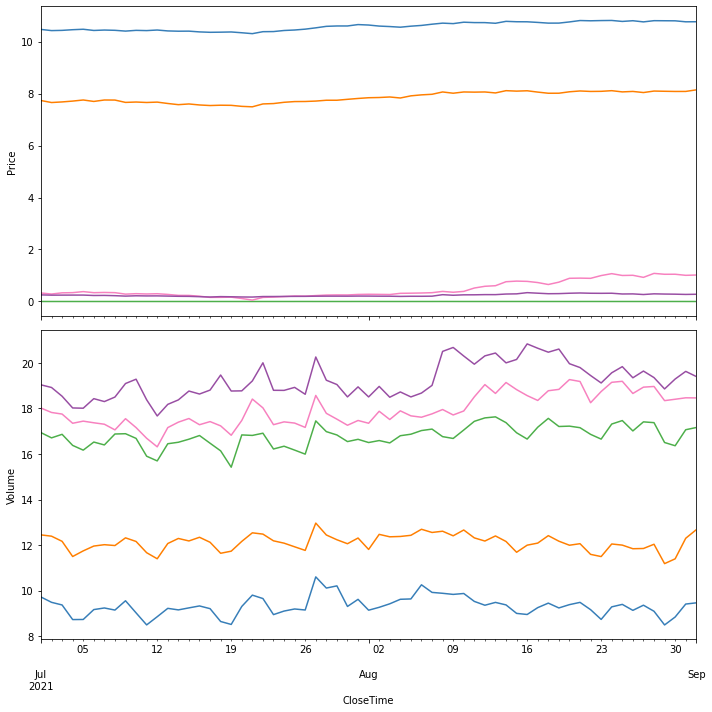

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw = {'height_ratios':[1, 1]})
df_copy1[df_copy1['Name'] == 'btcusd']['Log_ClosePrice'].plot(ax=ax1, color='#377eb8')
df_copy1[df_copy1['Name'] == 'ethusd']['Log_ClosePrice'].plot(ax=ax1, color='#ff7f00')
df_copy1[df_copy1['Name'] == 'usdtusd']['Log_ClosePrice'].plot(ax=ax1, color='#4daf4a')
df_copy1[df_copy1['Name'] == 'adausd']['Log_ClosePrice'].plot(ax=ax1, color='#f781bf')
df_copy1[df_copy1['Name'] == 'dogeusd']['ClosePrice'].plot(ax=ax1, color='#984ea3')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df_copy1[df_copy1['Name'] == 'btcusd']['Log_Volume'].plot(ax=ax2, color='#377eb8')
df_copy1[df_copy1['Name'] == 'ethusd']['Log_Volume'].plot(ax=ax2, color='#ff7f00')
df_copy1[df_copy1['Name'] == 'usdtusd']['Log_Volume'].plot(ax=ax2, color='#4daf4a')
df_copy1[df_copy1['Name'] == 'adausd']['Log_Volume'].plot(ax=ax2, color='#f781bf')
df_copy1[df_copy1['Name'] == 'dogeusd']['Log_Volume'].plot(ax=ax2, color='#984ea3')
ax2.set_ylabel('Volume')

fig.tight_layout()

Finally, we got our graph in one sight. This is still not perfect graph, but we could get general idea how the price of each cryptocurrencies changes. We can tell volume of 5 coins move very similarily along with bitcoin and ethereum. This is probably bitcoin and ethereum is main coins that are used to exchange between other coins. In perspective of price, **Adausd** shows steady increase over time compared to others.    